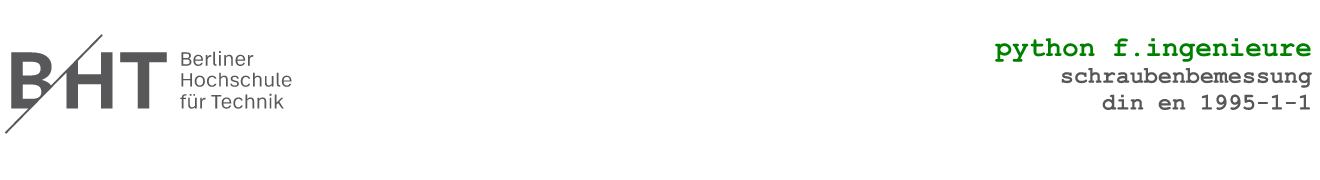

# Anwendungsbeispiel 2: Schraubenbemessung 

## Entwicklung einer Web-App mit Streamlit
### Einführung
Nachdem die Grundlagen für Vollgewindeschrauben durchgesprochen und eine Funktion für die Bemessung erstellt wurde, kann nun schrittweise eine Anwendung aufgebaut werden, welches mit der Bibliothek Streamlit erstellt wird.

### Erste Schritte

Die Installation von Streamlit erfolgt ebenso mit dem Modul-Installierer von Python (pip) und ist in der Entwicklungsumgebung nach dem Importieren sofort verfügbar. Für das Entwickeln einer Web-App wird nun eine Python-Datei (.py) in Spyder erstellt (.py). 

Um die Applikation zu starten, muss im Arbeitsverzeichnis der Befehl "streamlit run datei.py" ausgeführt werden, sodass sich ein Browserfenster mit der Applikation öffnet. 

Sobald in der Python-Datei weitere Elemente und Befehle hinzugefügt werden, werden die Änderungen nach einem Aktualisieren der Seite (Tastenbefehl "r") umgesetzt. Diese Arbeitsweise ermöglicht ein schnelles und intuitives Entwickeln der Anwendung. 

**Beispiel für die Ausführung im Terminal**
```python
cd C:\Users\Cal.Mense\Desktop\01_Streamlit
streamlit run streamlit.py
```

### Elemente in Streamlit

Die Nutzeroberfläche besteht aus einer schlichten Darstellung und kann unterteilt werden in ein Seitenfenster ("sidebar") und einem Hauptfenster. Dort können zeilenweise durch einfache Befehle verschiedene Elemente für Eingabefelder, Texte, Tasten, Tabellen und Grafiken eingefügt werden.

In der Online-Dokumentation ist eine ausführliche Übersicht aller möglichen Funktionalitäten aufgeführt. <br>
[Link: Streamlit API-Dokumentation](https://docs.streamlit.io/library/api-reference)

Es folgt eine Übersicht der wichtigsten Elemente, die für das Programm verwendet werden.

### Textelemente
Die Textelemente weisen unterschiedliche Formatierungen auf.
```Python
st.title('Einzelnachweis')    #1
st.subheader('Eingabwerte')   #2
st.write('Durchmesser [mm]')  #3
```

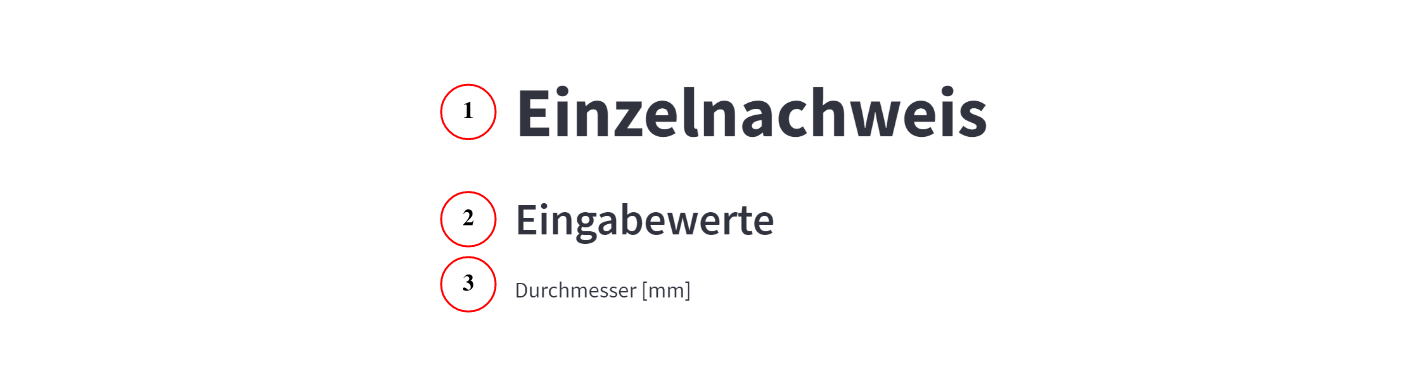
<center> Abbildung 3: Streamlit Textelemente </center> <br>

### Eingabeelemente
Für die Eingabeelemente wird für das erste Argument die Überschrift und für das zweite Argument die Auswahl angegeben.

```Python
st.text_input('Seitenholz 1 [mm]',50)
st.radio('Nachweisführung',('Charakteristische Werte', 'Bemessungswerte'), horizontal=True)
st.selectbox('Durchmesser', [6,8,10,12])
st.button('Einlesen')
```

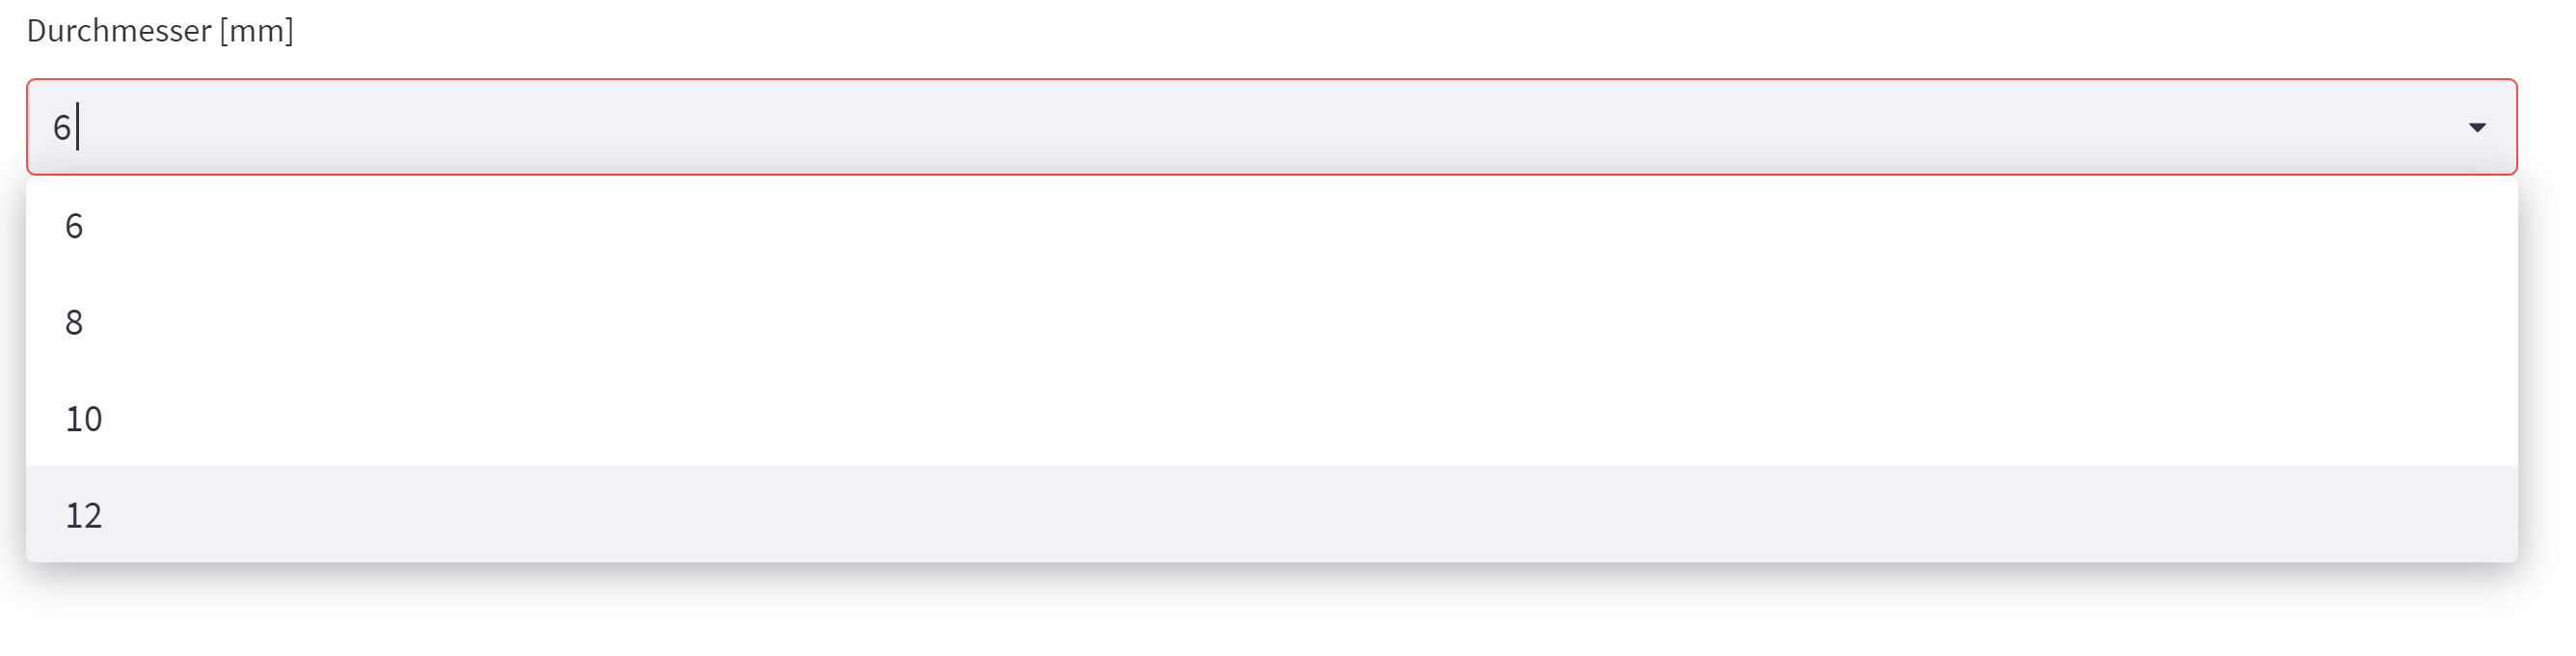
<center> Abbildung 4: Streamlit Eingabeelement "selectbox" </center> <br>

### Darstellungselemente

Um eine übersichtliche Darstellung zu wahren, können die Inhalte auf verschiedenen Registerseiten verteilt werden.

```Python
col_d6, col_d8, col_d10, col_d12  = st.tabs(["6 mm", "8 mm", "10 mm", "12 mm"])
```


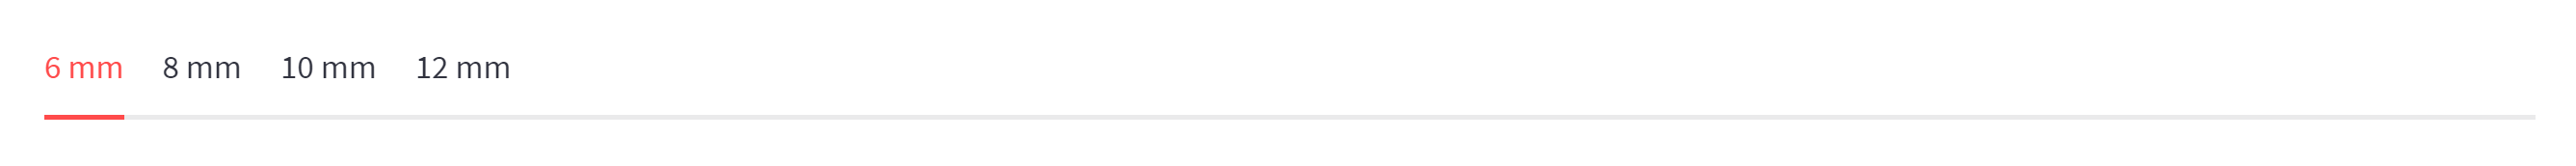
<center> Abbildung 5: Streamlit Darstellungselement "tabs" </center> <br>

## Bibliothek: Plotly 

Plotly gehört zu den beliebtesten Visualisierungs-Bibliotheken in Python und bietet eine große Auswahl an interaktiven Grafiken, die modern und übersichtlich aufbereitet werden können.

Grundsätzlich gibt es dabei zwei Arten, um Grafiken zu erzeugen. Über die sogenannten ```graph objects``` können Grafiken mit einer großen Vielzahl an Einstellungsmöglichkeiten gestaltet und modifiziert werden. Die zweite Variante bietet mit der ```express```-Methode eine schnellere Umsetzung mit weniger Gestaltungsfreiheit und wird für den Einstieg empfohlen.

Im folgenden Link gibt es eine Übersicht verschiedener Grafiken mit zahlreichen Beispielen. Die simplen Beispiele eignen sich für einen einfachen Einstieg und die Adaption für eigene Anwendungen (vgl. Plotly Graphic Libraries 2022).

[Link: Plotly Grafikübersicht](https://plotly.com/python/)

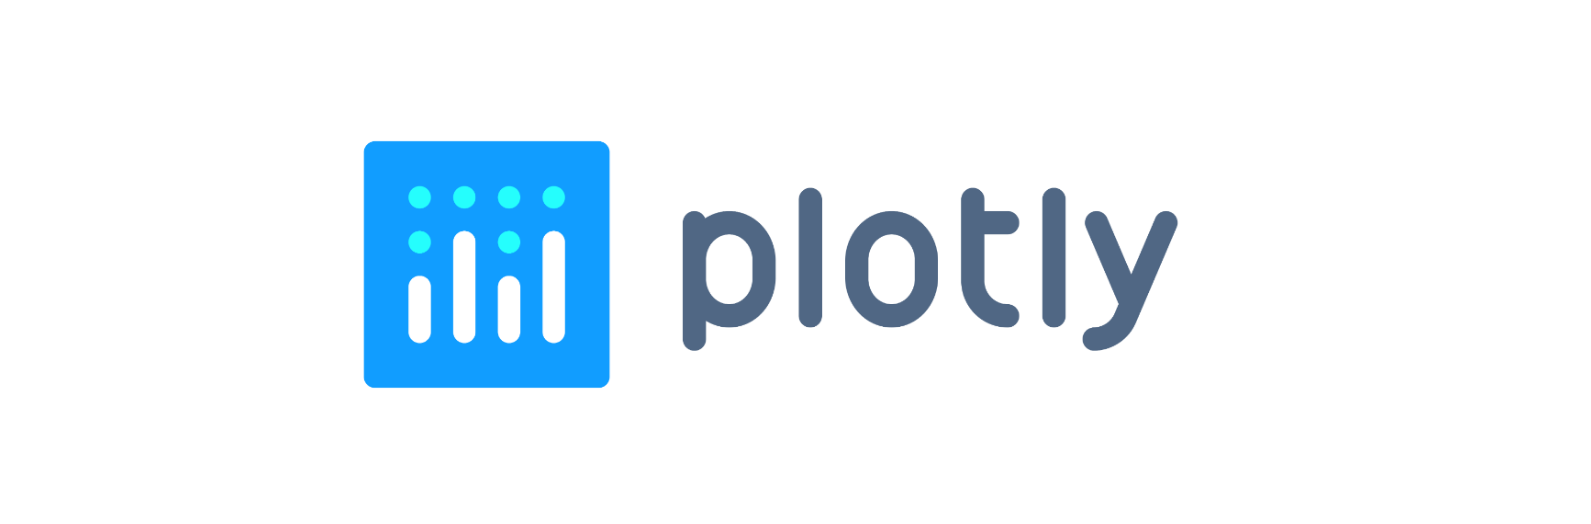
<center> Abbildung 5: Plotly Logo </center> <br>

### Anwendungsbeispiel

Die Nutzung von Tabellen und Diagrammen in *Plotly* soll im Folgenden anhand der in Kapitel 4.2 erstellten Funktion ```ec5_87_tragfähigkeit_vg()``` demonstriert werden.

In [2]:
from math import pi, sqrt
import numpy as np
import pandas as pd
import plotly as px
%run 4.2_Anwendungsbeispiel_2_Schraubenbemessung_Funktion.ipynb

In [21]:
#Eingabeparameter
Hersteller = 'Würth'
d = 6 #mm
t_1 = 120 #mm
t_2 = 500 #mm
t_Blech = 0 #mm
rho_k = 350 #kg/m3
alpha = 90 #Grad

#Listen
L_L = [80,100,120,140,160,180,200,220,240,260]
L_axial = []
L_scher = []
L_anmerk = []

for n,L in enumerate(L_L):
    F_axRk, F_vRk, nw = ec5_87_tragfähigkeit_vg(Hersteller, d, L, t_1, t_2, t_Blech, rho_k, alpha)
        
    L_axial.append(F_axRk)
    L_scher.append(F_vRk)
    L_anmerk.append(nw)

### Tabellen

Die allgemeine Vorgehensweise für das Kreieren einer Tabelle in Plotly besteht darin, zuerst ein *Figure-Objekt* zu erstellen. Dieses Objekt kann dann beliebig mit der Funktion *add_traces()* mit Graphen erweitert bzw. befüllt werden. Hier wird für das erste Argument *data* eine Liste zugewiesen, die schließlich ein Tabellen-Objekt beinhaltet. Das Tabellen-Objekt besitzt die Argumente für die Überschrift und Zellen der Tabelle, die mit einem dictionary hinzugefügt werden. Mit der Funktion *update_layout* können nun alle möglichen grafischen Eigenschaften modifiziert werden. 

```python
#Initiieren eines Figure-Objektes
tabelle = go.Figure()

#Hinzufügen einer Tabelle
tabelle.add_traces((data=[go.Table(header, cells)]))

#Aktualisieren von grafischen Elementen
tabelle.update_layout(width, height, title_text)
```


**Link zur Online-Dokumentation** <br>
[Plotly Tabellen](https://plotly.com/python/table/)<br>

In [22]:
import plotly.graph_objects as go

#Dictionaries
dict_header={'values':[('L','[mm]'),  ('F_axRk','[kN]'), ('F_vRk','[kN]')]}
dict_cells={'values':[L_L,  L_axial, L_scher]}

#Initiieren eines Figure-Objektes
tabelle = go.Figure()

#Hinzufügen einer Tabelle
tabelle.add_traces([go.Table(header=dict_header, cells=dict_cells)])

#### Modifizieren der Farben

Das Modifizieren der Farben erfolgt getrennt für die Überschriftszeile und der Tabellenzellen, indem jedes Dictionary mit folgenden Schlüsseln und Werten erweitert wird. 

```python
#Schrift
'font':{'size':15, 'color':'white'}

#Füllfarbe
'fill_color':'lightslategrey'

#Linienfarbe
'line_color':'white'
```

In [23]:
import plotly.graph_objects as go

#Farben
grey = '#bfced8'
dark_grey = 'lightslategrey'
red = '#ff4b4b'

#Dictionaries
dict_header={'values':[('L','[mm]'),  ('F_axRk','[kN]'), ('F_vRk','[kN]')],
            'align':'center','font':{'size':15, 'color':'white'}, 'fill_color':dark_grey, 'line_color':'white'}

dict_cells={'values':[L_L,  L_axial, L_scher],
           'height':30,'font':{'size':15, 'color':'black'}, 'fill_color':grey}

#Initiieren eines Figure-Objektes
tabelle = go.Figure()

#Hinzufügen einer Tabelle
tabelle.add_traces([go.Table(header=dict_header, cells=dict_cells)])

### Diagramme

Das folgende Balkendiagramm wird auf eine etwas andere Art erstellt. Hierfür wird die *plotly express-* Methode angewendet, bei der zunächst die verwendeten Daten in einem Dictionary (oder DataFrame) verpackt werden. Schließlich wird mit dem Befehl *px.bar* das Diagramm erzeugt.

```python
#Erstellen eines Dictionaries
dict = {'x':x-Werte, 'y':y-Werte}

#Hinzufügen einer Tabelle
px.bar(Dictionary, x=x-Werte, y=y-Werte)
```

**Link zur Online-Dokumentation** <br>
[Plotly Balkendiagramme](https://plotly.com/python/bar-charts/)<br>

**Link zur API Referenz** <br>
[Plotly Balkendiagramme](https://plotly.com/python-api-reference/generated/plotly.express.bar.html?highlight=bar#plotly.express.bar)<br>

In [7]:
import plotly.express as px

#Erstellen eines Dictionaries
dict_d6 = {'L': L_L, 'F_axRk': L_axial, 'F_vRk': L_scher}

#Hinzufügen einer Tabelle
fig =  px.bar(dict_d6, x='L', y='F_axRk')

#Anzeigen der Tabelle
fig.show()

#### Modifizieren der Farben und Hinzufügen von Textelementen

Nachdem, wie im zuvorigen Beispiel ein Diagramm der variable *fig* zugeordnet und erzeugt wurde, können nun beliebig Elemente hinzugefügt und weitere Eigenschaften modelliert werden. 

In [8]:
import plotly.express as px

#Farben
grey = '#bfced8'
dark_grey = 'lightslategrey'
red = '#ff4b4b'

#Erstellen eines Dictionaries
dict_d6 = {'L': L_L, 'F_axRk': L_axial, 'F_vRk': L_scher}

#Hinzufügen einer Tabelle
fig =  px.bar(dict_d6, x='L', y='F_axRk', text_auto=True, title='Tragfähigkeiten', height=600, width=1000)

#Hinzufügen einer Axenbeschriftung
fig.update_yaxes(title_text="Tragfähigkeit [kN]")
fig.update_xaxes(title_text="Längen [m]")

#Hinzufügen eines Textelementes
fig.add_annotation(text='Maximalwert', x=L_L[-1], y=max(L_axial), arrowhead=1, showarrow=True, yshift=+20,
                                           font={'size':15, 'color':'black'})

#Modifizieren der Farben
fig.update_traces(marker_color=dark_grey, textfont={'color':'white'})

#Anzeigen der Tabelle
fig.show()

### Fortgeschrittene Darstellungen

Nachdem nun die beiden grundsätzlichen Arten der Erstellung von Tabellen und Grafiken demonstriert und weitere grafische und textbasierte Elemente zu modifiziert wurden, soll nun im letzten Schritt ein Filter integriert werden, der je nach Eingabe die Ergebnisse farblich abhebt.

Im Detail, sollen die Tragfähigkeiten der Schraube einer Einwirkung gegenübergestellt werden, sodass die Schrauben mit einer Tragfähigkeit größer als die Einwirkung in der Tabelle und in dem Diagramm farblich abgesetzt werden.

#### Tabelle


In [9]:
import plotly.graph_objects as go

#Eingabeparameter
Hersteller = 'Würth'
d = 6 #mm
t_1 = 120 #mm
t_2 = 500 #mm
t_Blech = 0 #mm
rho_k = 350 #kg/m3
alpha = 90 #Grad

#Listen
L_L = [80,100,120,140,160,180,200,220,240,260]
L_axial = []
L_scher = []
L_anmerk = []

for n,L in enumerate(L_L):
    F_axRk, F_vRk, nw = ec5_87_tragfähigkeit_vg(Hersteller, d, L, t_1, t_2, t_Blech, rho_k, alpha)
        
    L_axial.append(F_axRk)
    L_scher.append(F_vRk)

Um die Farben der einzelnen Zellen individuell anzusprechen, muss zunächst für jede Spalte eine Liste erstellt werden. Diese Liste muss dann für jede Zelle eine Farbe enthalten. 

Dies wird mit einer Schleife und einer if-Abfrage umgesetzt, bei der die Einwirkung nacheinander mit der Tragfähigkeit gegenübergestellt wird und entsprechend eine Farbe mit der *append-Funktion* in die Liste angehängt wird. Nachdem die Listen mit den Farben befüllt sind, kann die Tabelle erzeugt werden. 

Werden die Eingabewerte der Einwirkungen geändert, aktualisiert sich die Farbgebung der Tabelle automatisch, sodass eine interaktive Nutzung der Tabelle erzeugt wird.

In [25]:
##Einwirkung
F_td = 4 #kN
F_vd = 5 #kN

##Tabelle
L_t_fill2 = []
L_t_fill3 = []   

#Farben
light_grey = '#f0f2f6'
grey = '#bfced8'
dark_grey = 'lightslategrey'
red = '#ff4b4b'

#Dictionaries
dict_header={'values':[('L','[mm]'),  ('F_axRk','[kN]'), ('F_vRk','[kN]')],
            'align':'center','font':{'size':15, 'color':'black'}, 'fill_color':grey, 'line_color':'white'}

dict_cells={'values':[L_L,  L_axial, L_scher],
           'height':30,'font':{'size':15, 'color':'black'}, 'fill_color':[light_grey, L_t_fill2, L_t_fill3]}

#Schleife für Farbgebung
for i in range(len(L_L)):
    if L_axial[i] < F_td:
        dict_cells['fill_color'][1].append(light_grey)
    else: 
        dict_cells['fill_color'][1].append(red)        
        
    if L_scher[i] < F_vd:
        dict_cells['fill_color'][2].append(light_grey)
    else: 
        dict_cells['fill_color'][2].append(dark_grey)   
        
#Initiieren eines Figure-Objektes
tabelle = go.Figure()

#Hinzufügen einer Tabelle
tabelle.add_traces([go.Table(header=dict_header, cells=dict_cells)])

#### Diagramm

In [27]:
import plotly.express as px

##Einwirkung
F_td = 3 #kN
F_vd = 1 #kN

#Farben
grey = '#bfced8'
dark_grey = 'lightslategrey'
red = '#ff4b4b'

#Listen
L_colors_bar = []

#Erstellen eines Dictionaries
dict_d6 = {'L': L_L, 'F_axRk': L_axial, 'F_vRk': L_scher}

#Hinzufügen einer Tabelle
fig =  px.bar(dict_d6, x='L', y='F_axRk', text_auto=True, title='Axialtragfähigkeiten', height=600, width=1000)

#Schleife für Farbgebung
for i in range(len(L_L)):
    
    if L_axial[i] < F_td:
        L_colors_bar.append(grey)
    else: 
        L_colors_bar.append(red)       
         
#Hinzufügen einer Axenbeschriftung
fig.update_traces(marker_color=L_colors_bar)

#Hinzufügen einer Axenbeschriftung
fig.update_yaxes(title_text="Axialtragfähigkeit [kN]")
fig.update_xaxes(title_text="Längen [m]")


#Anzeigen der Tabelle
fig.show()


## Erstellung eines Einzelnachweises

Neben der Darstellung der Tragfähigkeiten der Vollgewindeschrauben in Form von Tabellen und Diagrammen soll die Anzeige eines Einzelnachweises ermöglicht werden. Dabei sollen die Berechnungen mit Hilfe der in Streamlit integrierten Funktion *st.latex* in Latex formatiert angezeigt werden (vgl. Streamlit Documentation 2022).

```python
st.latex()
```

### Latex

Hierzu werden im Groben die Grundlagen in Latex erläutert.

#### Tiefstellungen

Grundsätzlich werden mathematische Formeln in Latex innerhalb von Dollarzeichen geschrieben.
Tiefstellungen werden mit einem Unterstrich getrennt und werden in geschweiften Klammern definiert.

<center> 

```python 
$f_{headk}$ 
```
 

</center>
<center>$f_{headk}$</center>

#### Mathematische Operatoren

Wird ein Latex-Befehl initiiert, wird ein Rückwärtsschrägstrich verwendet. 
Darauf folgen mathematische Operatoren, wie Brüche, Wurzeln oder griechische Symbole.


<b>Brüche<b>
<center> 

```python 
$\frac{f_{hk}*t_{1}*d}{2+\beta}$
```
<center> $\frac{f_{hk}*t_{1}*d}{2}$


<b>Wurzeln<b>
<center>

```python 
$\sqrt{2*(1+f_{hk})}$
```
<center> $\sqrt{2*(1+f_{hk})}$


<b>Griechische Symbole<b>
<center> 

```python 
$\pi$ $\omega$ $\lambda$ $\phi$
```
<center> $\pi$ $\omega$ $\lambda$ $\phi$


<b>Weitere Operatoren<b><center>

```python 
$\sin(\alpha))$ 
```
<center> $\sin(\alpha))$ 

<b>Komplexe Brüche<b>

<center> 

```python 
$\left(\sqrt{2\beta*(1+\beta)+\frac{4*\beta*(2+\beta)*M_{yRk}}{f_{hk}*d*t_{1}^2}}-\beta\right)$
```
<center> $\left(\sqrt{2\beta*(1+\beta)+\frac{4*\beta*(2+\beta)*M_{yRk}}{f_{hk}*d*t_{1}^2}}-\beta\right)$

# Literaturverzeichnis

[1] Plotly Graphic Libraries (2022): [online] https://plotly.com/python/ [abgerufen am 06.09.2022]. <br>
[2] Streamlit Documentation (2022): [online] https://docs.streamlit.io/ [abgerufen am 06.09.2022].

---
Berliner Hochschule für Technik (BHT) | Konstruktiver Hoch- und Ingenieurbau (M.Eng.) <br>
Ingenieurholzbau | Prof. Dr. Jens Kickler | Cal Mense 914553 | September 2022